In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train) ,(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 62s 0us/step


(50000, 32, 32, 3)

In [4]:
y_train = y_train.reshape(-1,) #To get a 1D array

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Enter index :  4


Text(0.5, 0, 'automobile')

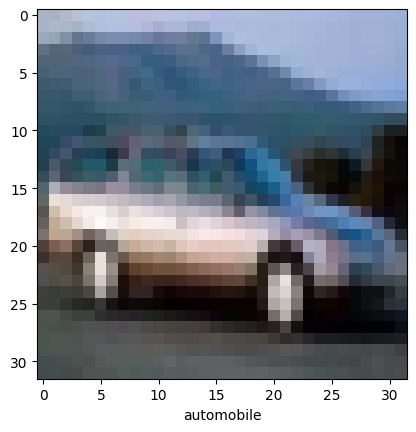

In [6]:
index = int(input("Enter index : "))
plt.imshow(X_train[index])
plt.xlabel(classes[y_train[index]])

In [10]:
# Normalization
X_train = X_train / 255
X_test = X_test / 255

In [19]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(3000,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])

ann.compile(optimizer='SGD',
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3010 - accuracy: 0.1271
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3000 - accuracy: 0.1400
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.2992 - accuracy: 0.1376
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.2984 - accuracy: 0.1576
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.2974 - accuracy: 0.1501
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.2962 - accuracy: 0.1673
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.2946 - accuracy: 0.1519
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.2928 - accuracy: 0.1815
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.2903 - accuracy: 0.1820
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - l

In [20]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.2848 - accuracy: 0.1726


[2.2848238945007324, 0.17260000109672546]

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test,y_pred_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.28      0.45      0.35      1000
           1       0.00      0.00      0.00      1000
           2       0.10      0.31      0.15      1000
           3       0.00      0.00      0.00      1000
           4       0.15      0.67      0.25      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.37      0.29      0.33      1000
           9       1.00      0.00      0.00      1000

    accuracy                           0.17     10000
   macro avg       0.19      0.17      0.11     10000
weighted avg       0.19      0.17      0.11     10000



C:\Users\Abhay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Abhay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Abhay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [22]:
cnn = models.Sequential([

    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

cnn.compile(optimizer='adam',
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0993 - accuracy: 0.2372
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9309 - accuracy: 0.3147
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8498 - accuracy: 0.3436
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7841 - accuracy: 0.3660
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7301 - accuracy: 0.3855
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6865 - accuracy: 0.3989
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6488 - accuracy: 0.4102
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6187 - accuracy: 0.4223
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5929 - accuracy: 0.4326
Epoch 10/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.571

In [23]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5541 - accuracy: 0.4478


[1.5541383028030396, 0.44780001044273376]